In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
#carregar base de dados para análise
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [56]:
#preparação dos dados:
df_merged = pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

print("df_merged.shape: ({} x {})".format(df_merged.shape[0], df_merged.shape[1]))

age_median = df_merged['Age'].median()
df_merged['Age'].fillna(age_median, inplace=True)

fare_median = df_merged['Fare'].median()
df_merged['Fare'].fillna(fare_median, inplace=True)

embarked_top = df_merged['Embarked'].value_counts()[0]
df_merged['Embarked'].fillna(embarked_top, inplace=True)

df_merged.shape: (1309 x 12)


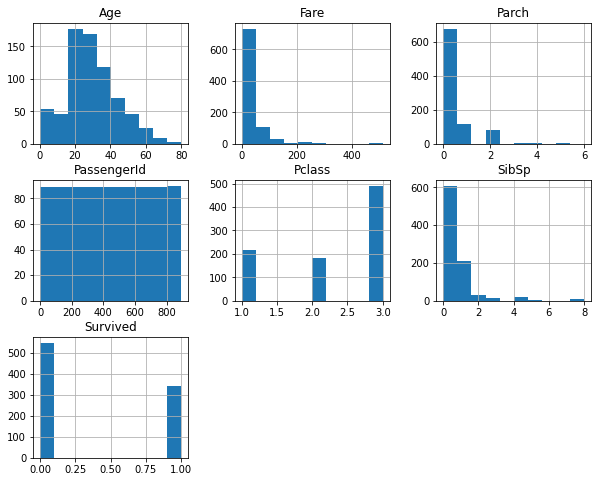

In [57]:
#histograma das variáveis numéricas
train.hist(figsize=(10,8));

In [60]:
#Probabilidade de sobrevivência por sexo
train[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


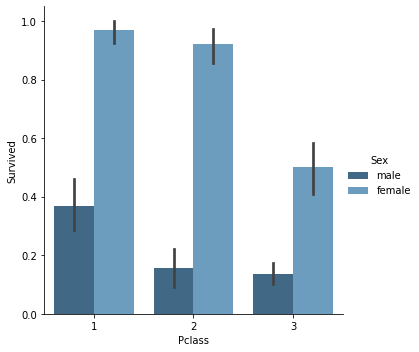

In [66]:
g = sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df_merged, kind='bar', palette = "Blues_d")

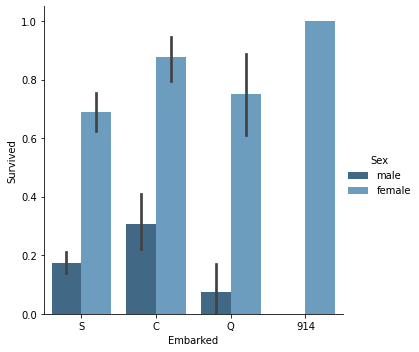

In [73]:
g = sns.catplot(x='Embarked', y='Survived', hue='Sex', data=df_merged, kind='bar', palette = "Blues_d")

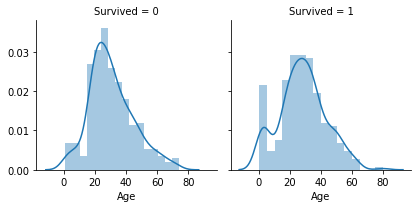

In [70]:
#influencia da idade
age_survived = sns.FacetGrid(train, col='Survived')
age_survived.map(sns.distplot, 'Age')

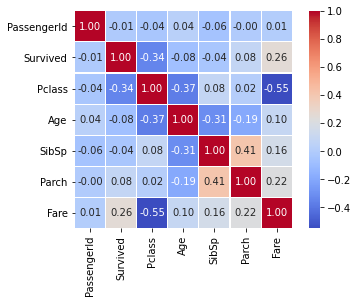

In [71]:
sns.heatmap(train.corr(), cmap='coolwarm', fmt='.2f', linewidths=0.1,
            vmax=1.0, square=True, linecolor='white', annot=True);